### <b>Aprendizado de Máquina</b><i> Estudo</i> .0010<br>

In [ ]:
# Para manipulação de dados
import pandas as pd
import numpy as np

# Para gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# para modelagem
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


#### Settings ###########
pd.options.display.float_format = "{:,.2f}".format

<b>Mais sobre os campos do dataset:</b>



* Age (numeric)
* Sex (text: male, female)
* Job (numeric: 0 — unskilled and non-resident, 1 — unskilled and resident, 2 — skilled, 3 — highly skilled)
* Housing (text: own, rent, or free)
* Saving accounts (text — little, moderate, quite rich, rich)
* Checking account (numeric, in DM — Deutsch Mark)
* Credit amount (numeric, in DM)
* Duration (numeric, in month)
* Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/database/german_credit.csv', index_col= 0) # sep=';' , decimal= ','
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df.shape
print(f'A base de dados possui {df.shape[0]} Linhas e {df.shape[1]} Colunas \n')
df.info()

A base de dados possui 1000 Linhas e 10 Colunas 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [ ]:
df.groupby('Sex')['Age', 'Credit amount', 'Duration'].mean()

<ipython-input-43-ed4fd6ad8954>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Sex')['Age', 'Credit amount', 'Duration'].mean()


,Age,Credit amount,Duration
Sex,,,
female,32.80,"2,877.77",19.44
male,36.78,"3,448.04",21.56


In [ ]:
df.isna().mean()

Age                0.00
Sex                0.00
Job                0.00
Housing            0.00
Saving accounts    0.18
Checking account   0.39
Credit amount      0.00
Duration           0.00
Purpose            0.00
Risk               0.00
dtype: float64

In [ ]:
df.Housing.value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [ ]:
df.Sex.value_counts(normalize= True).sort_index()

female   0.31
male     0.69
Name: Sex, dtype: float64

In [ ]:
# Método para tentar inferir se a variável é categórica
provavel_categorica = {}

for var in df.columns:
  provavel_categorica[var] = 1.0 * df[var].nunique()/df[var].count() < 0.03

provavel_categorica

{'Age': False,
 'Sex': True,
 'Job': True,
 'Housing': True,
 'Saving accounts': True,
 'Checking account': True,
 'Credit amount': False,
 'Duration': False,
 'Purpose': True,
 'Risk': True}

In [ ]:
df['Target']= np.where(df['Risk'] == 'bad', 1, 0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Target
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1
2,49,male,1,own,little,NaN,2096,12,education,good,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,0
4,53,male,2,free,little,little,4870,24,car,bad,1


In [ ]:
df.drop('Risk', axis=1, inplace= True)

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Target
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [ ]:
df.Target.value_counts(normalize= True)

0   0.70
1   0.30
Name: Target, dtype: float64

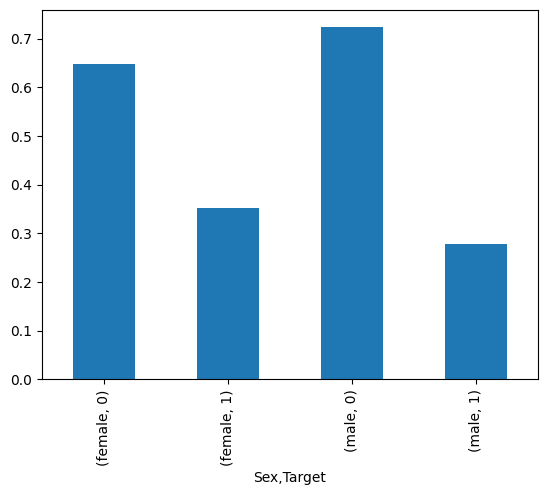

In [ ]:
df.groupby('Sex')['Target'].value_counts(normalize= True).plot(kind= 'bar');

Text(0.5, 0, 'Idade')

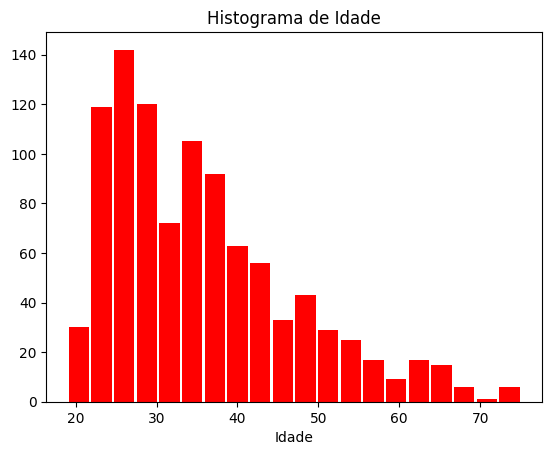

In [ ]:
plt.hist(data= df, x= 'Age', bins= 20, rwidth= 0.9, color= 'red');
plt.title('Histograma de Idade')
plt.xlabel('Idade')

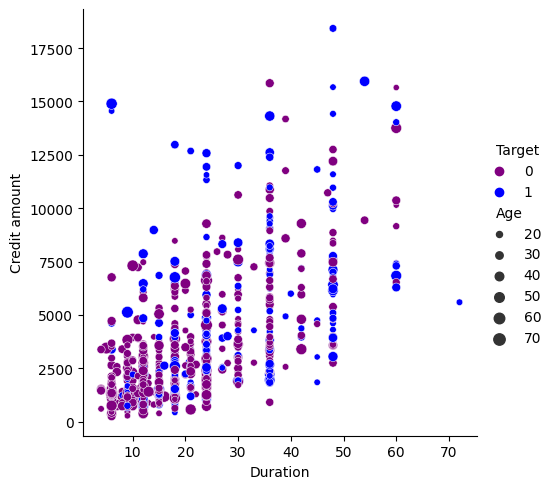

In [ ]:
_ = sns.relplot(data= df, x= 'Duration', y= 'Credit amount', hue= 'Target', palette= ['purple', 'blue'], size= 'Age')

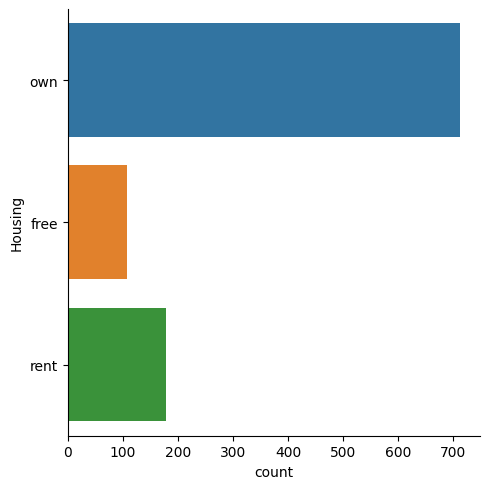

In [ ]:
_ = sns.catplot(data= df, y= 'Housing', kind= 'count')

In [ ]:
features = ["Age", "Job", "Credit amount", "Purpose", "Housing", "Duration"]
target = "Target"

In [ ]:
# Agora, dividimos antes de qualquer pré-processamento
X = df[features]  # Features
y = df[target]  # Labels

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=999
)

In [ ]:
pip install category_encoders

In [ ]:
# Precisamos tratar as variáveis categóricas (Cuidado quando for numérica)
cat_features = ["Job", "Housing", "Purpose"]
num_features = ["Age", "Credit amount", "Duration"]

In [ ]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols= cat_features)

X_train = encoder.fit_transform(X_train)

X_train.head()

,Age,Job_1,Job_2,Job_3,Job_4,Credit amount,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8,Housing_1,Housing_2,Housing_3,Duration
763,30,1,0,0,0,12680,1,0,0,0,0,0,0,0,1,0,0,21
534,25,0,1,0,0,3105,0,1,0,0,0,0,0,0,0,1,0,24
86,27,0,1,0,0,1295,0,0,1,0,0,0,0,0,0,1,0,18
927,39,0,1,0,0,10297,1,0,0,0,0,0,0,0,1,0,0,48
134,21,0,1,0,0,10144,0,1,0,0,0,0,0,0,0,1,0,60


In [ ]:
X_test.head()

,Age,Job,Credit amount,Purpose,Housing,Duration
842,23,2,1943,repairs,own,18
68,37,2,1819,education,free,36
308,24,2,1237,furniture/equipment,own,8
881,48,2,9277,car,free,24
350,23,2,1236,domestic appliances,rent,9


In [ ]:
X_test= encoder.transform(X_test)
X_test.head()

,Age,Job_1,Job_2,Job_3,Job_4,Credit amount,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8,Housing_1,Housing_2,Housing_3,Duration
842,23,0,1,0,0,1943,0,0,0,0,1,0,0,0,0,1,0,18
68,37,0,1,0,0,1819,0,0,0,0,0,0,0,1,1,0,0,36
308,24,0,1,0,0,1237,0,0,1,0,0,0,0,0,0,1,0,8
881,48,0,1,0,0,9277,1,0,0,0,0,0,0,0,1,0,0,24
350,23,0,1,0,0,1236,0,0,0,0,0,0,1,0,0,0,1,9


In [ ]:
clf_RF= RandomForestClassifier() # Instanciar = Inicializar/ Criar o objeto
clf_RF.fit(X_train, y_train) # Treina o modelo

RandomForestClassifier()

In [ ]:
# Aplica no teste
y_pred= clf_RF.predict(X_test)

y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Metricas de avaliação
from sklearn.metrics import accuracy_score

print("Acurácia: "+  str(accuracy_score(y_test, y_pred))) # Acertos ao todo

from sklearn.metrics import f1_score

print("F1 Score: {}".format(f1_score(y_test, y_pred)))
# Indica poucos falsos positivos e falsos negativos, quanto mais próximo de 1, melhor

Acurácia: 0.6633333333333333
F1 Score: 0.3221476510067114


In [ ]:
from sklearn.metrics import confusion_matrix

print("Matriz de Confusão: \n"+ str(confusion_matrix(y_test, y_pred)))

Matriz de Confusão: 
[[175  24]
 [ 77  24]]


In [ ]:
tn, fp, fn, tp= confusion_matrix(y_test, y_pred).ravel()
print("True Positive: " + str(tp))
print("True Negative: " + str(tn))
print("False Positive: " + str(fp))
print("False Negative: " + str(fn))

True Positive: 24
True Negative: 175
False Positive: 24
False Negative: 77


In [ ]:
21/ (21+ 27)

0.4375

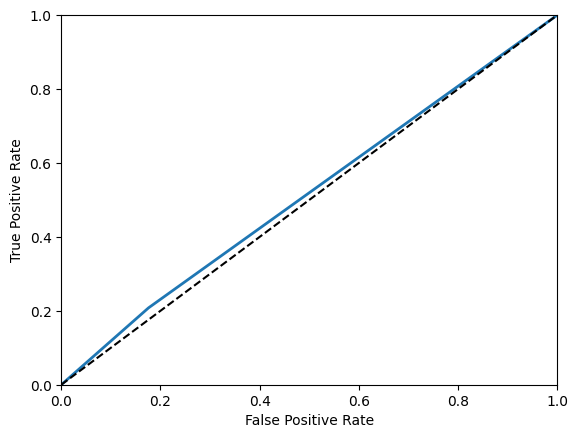

In [ ]:
# CURVA ROC: calcula fpr e tpr para vários limiares
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# probabilidades
probs = clf_RF.predict_proba(X_test)

y_scores = cross_val_predict(clf_RF, X_test, y_test)

# obtem fpr, tpr e limites
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")


plot_roc_curve(fpr, tpr)

In [ ]:
# Feature Importance
feature_imp= pd.Series(clf_RF.feature_importances_, index= X_train.columns).sort_values(ascending= False)
feature_imp

Credit amount   0.32
Age             0.24
Duration        0.19
Purpose_1       0.03
Job_2           0.03
Job_3           0.02
Housing_2       0.02
Purpose_3       0.02
Purpose_2       0.02
Job_1           0.02
Purpose_8       0.02
Purpose_4       0.02
Housing_3       0.02
Housing_1       0.01
Purpose_5       0.01
Purpose_7       0.01
Job_4           0.01
Purpose_6       0.00
dtype: float64

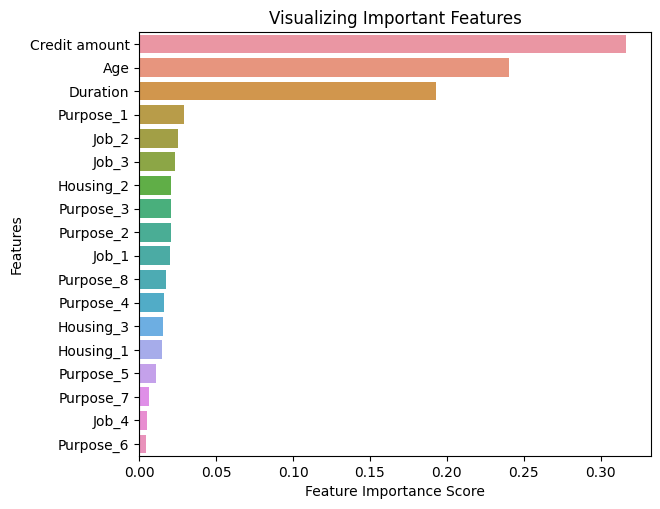

In [ ]:
# Creating a bar plot
_ = plt.figure(figsize=(6.6, 5.5))
_ = sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
_ = plt.xlabel("Feature Importance Score")
_ = plt.ylabel("Features")
_ = plt.title("Visualizing Important Features")
_ = plt.savefig("rf_features.png")

In [ ]:
# Continuação quando eu já não estava nem raciocinando mais

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

# Tunando os hiperparâmetros:
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    "n_estimators": randint(4, 200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    "max_features": truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    "min_samples_split": uniform(0.01, 0.199),
}

# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=10, cv=5, random_state=1)

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(X_train, y_train)

# print winning set of hyperparameters
from pprint import pprint

pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.27616377599617853,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 0.039204422272605496,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 148,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Qual combinação de parâmetros trouxe melhor resultado:
model.best_estimator_

RandomForestClassifier(max_features=0.27616377599617853,
                       min_samples_split=0.039204422272605496,
                       n_estimators=148)

In [ ]:
clf_random = RandomForestClassifier(
    max_features=0.3124639258611636,
    min_samples_split=0.05068599769657197,
    n_estimators=160,
)

clf_random.fit(X_train, y_train)

RandomForestClassifier(max_features=0.3124639258611636,
                       min_samples_split=0.05068599769657197, n_estimators=160)

In [ ]:
y_pred_random = clf_random.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_random) * 100
f1 = f1_score(y_test, y_pred_random) * 100

print("Acurácia: {: .2f} %.".format(accuracy))
print("F1 Score: {: .2f} %.".format(f1))

Acurácia:  68.67 %.
F1 Score:  25.40 %.
